In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Load all Excel files
print("Loading Excel files...")

# Load each dataset from Excel files with correct variable names
BonusCost_Data = pd.read_excel(r"C:\Users\dhana\Downloads\BonusCost_Data.xlsx")
First_Bet_Data = pd.read_excel(r"C:\Users\dhana\Downloads\First_Bet_Data.xlsx")
First_Deposit_Data = pd.read_excel(r"C:\Users\dhana\Downloads\First_Deposit_Data.xlsx")
Player_Activity_Data = pd.read_excel(r"C:\Users\dhana\Downloads\Player_Activity_Data.xlsx")
Player_Details = pd.read_excel(r"C:\Users\dhana\Downloads\Player_Details.xlsx")

print("✅ All Excel files loaded successfully!")

# Display basic information about each dataset
print("\n" + "="*60)
print("DATASET OVERVIEW & DATA QUALITY CHECK")
print("="*60)

# Corrected dataset dictionary with your actual variable names
datasets = {
    'BonusCost_Data': BonusCost_Data,
    'First_Bet_Data': First_Bet_Data, 
    'First_Deposit_Data': First_Deposit_Data,
    'Player_Activity_Data': Player_Activity_Data,
    'Player_Details': Player_Details
}

for name, df in datasets.items():
    print(f"\n📊 {name.upper()}:")
    print(f"   Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")
    print(f"   Columns: {list(df.columns)}")
    print(f"   Data Types:")
    print(df.dtypes)
    print(f"   Missing Values:")
    missing_data = df.isnull().sum()
    for col, missing in missing_data.items():
        if missing > 0:
            print(f"      {col}: {missing} ({missing/len(df)*100:.1f}%)")
    if missing_data.sum() == 0:
        print("      No missing values ✓")
    
    print(f"   First 2 rows:")
    print(df.head(2))
    print("-" * 50)

Loading Excel files...
✅ All Excel files loaded successfully!

DATASET OVERVIEW & DATA QUALITY CHECK

📊 BONUSCOST_DATA:
   Shape: (207071, 5) (Rows: 207071, Columns: 5)
   Columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
   Data Types:
Unnamed: 0    float64
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
dtype: object
   Missing Values:
      Unnamed: 0: 207071 (100.0%)
   First 2 rows:
   Unnamed: 0     Unnamed: 1           Unnamed: 2 Unnamed: 3  Unnamed: 4
0         NaN  Src_PLAYER_ID        ActivityMonth    Product  BONUS_COST
1         NaN       16051927  2020-06-30 00:00:00    eGaming          50
--------------------------------------------------

📊 FIRST_BET_DATA:
   Shape: (292786, 8) (Rows: 292786, Columns: 8)
   Columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
   Data Types:
Unnamed: 0    float64
Unnamed: 1     object
Unnamed: 2     ob

In [2]:
# Reload all datasets with proper header handling
print("Reloading datasets with proper headers...")

# Load datasets skipping the first row which contains actual column names
BonusCost_Data = pd.read_excel(r"C:\Users\dhana\Downloads\BonusCost_Data.xlsx", skiprows=1)
First_Bet_Data = pd.read_excel(r"C:\Users\dhana\Downloads\First_Bet_Data.xlsx", skiprows=1)
First_Deposit_Data = pd.read_excel(r"C:\Users\dhana\Downloads\First_Deposit_Data.xlsx", skiprows=1)
Player_Activity_Data = pd.read_excel(r"C:\Users\dhana\Downloads\Player_Activity_Data.xlsx", skiprows=1)
Player_Details = pd.read_excel(r"C:\Users\dhana\Downloads\Player_Details.xlsx", skiprows=1)

print("✅ Datasets reloaded with proper headers!")

# Let's check the cleaned structure
print("\n" + "="*60)
print("CLEANED DATASET STRUCTURE")
print("="*60)

cleaned_datasets = {
    'BonusCost_Data': BonusCost_Data,
    'First_Bet_Data': First_Bet_Data, 
    'First_Deposit_Data': First_Deposit_Data,
    'Player_Activity_Data': Player_Activity_Data,
    'Player_Details': Player_Details
}

for name, df in cleaned_datasets.items():
    print(f"\n📊 {name.upper()}:")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")
    print(f"   First 2 rows:")
    print(df.head(2))
    print(f"   Missing values count:")
    print(df.isnull().sum())
    print("-" * 50)

Reloading datasets with proper headers...
✅ Datasets reloaded with proper headers!

CLEANED DATASET STRUCTURE

📊 BONUSCOST_DATA:
   Shape: (207070, 5)
   Columns: ['Unnamed: 0', 'Src_PLAYER_ID', 'ActivityMonth', 'Product', 'BONUS_COST']
   First 2 rows:
   Unnamed: 0  Src_PLAYER_ID ActivityMonth  Product  BONUS_COST
0         NaN       16051927    2020-06-30  eGaming        50.0
1         NaN       19309540    2021-02-28  eGaming        40.0
   Missing values count:
Unnamed: 0       207070
Src_PLAYER_ID         0
ActivityMonth         0
Product               0
BONUS_COST            0
dtype: int64
--------------------------------------------------

📊 FIRST_BET_DATA:
   Shape: (292785, 8)
   Columns: ['Unnamed: 0', 'Src_Player_Id', 'System_First_Bet_Datetime', 'System_First_BetSlip_Amt', 'System_First_Bet_Product_Group', 'System_First_Bet_Product', 'System_First_Bet_Channel', 'System_First_Bet_Platform']
   First 2 rows:
   Unnamed: 0  Src_Player_Id System_First_Bet_Datetime  \
0        

In [3]:
# Remove unnecessary 'Unnamed: 0' columns and clean the data
print("Cleaning datasets and preparing for analysis...")

# Remove Unnamed columns from all datasets
BonusCost_Data = BonusCost_Data.drop(columns=['Unnamed: 0'])
First_Bet_Data = First_Bet_Data.drop(columns=['Unnamed: 0'])
First_Deposit_Data = First_Deposit_Data.drop(columns=['Unnamed: 0'])
Player_Activity_Data = Player_Activity_Data.drop(columns=['Unnamed: 0'])
Player_Details = Player_Details.drop(columns=['Unnamed: 0'])

print("✅ Removed unnecessary columns")

# Check for duplicate players in key datasets
print("\n" + "="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)

print(f"Player_Details unique players: {Player_Details['Src_Player_Id'].nunique()}")
print(f"First_Deposit_Data unique players: {First_Deposit_Data['Src_Player_Id'].nunique()}")
print(f"First_Bet_Data unique players: {First_Bet_Data['Src_Player_Id'].nunique()}")

# Check for players with missing first deposit dates (these didn't deposit)
players_with_deposit = First_Deposit_Data[First_Deposit_Data['First_Deposit_Date'].notna()]
players_with_bet = First_Bet_Data[First_Bet_Data['System_First_Bet_Datetime'].notna()]

print(f"\nPlayers with first deposit: {len(players_with_deposit)}")
print(f"Players with first bet: {len(players_with_bet)}")
print(f"Players without deposit: {len(First_Deposit_Data) - len(players_with_deposit)}")
print(f"Players without bet: {len(First_Bet_Data) - len(players_with_bet)}")

# Convert date columns to datetime format
print("\nConverting date columns to proper format...")
Player_Details['Signup_Date'] = pd.to_datetime(Player_Details['Signup_Date'])
First_Deposit_Data['First_Deposit_Date'] = pd.to_datetime(First_Deposit_Data['First_Deposit_Date'])
First_Bet_Data['System_First_Bet_Datetime'] = pd.to_datetime(First_Bet_Data['System_First_Bet_Datetime'])
Player_Activity_Data['ActivityMonth'] = pd.to_datetime(Player_Activity_Data['ActivityMonth'])
BonusCost_Data['ActivityMonth'] = pd.to_datetime(BonusCost_Data['ActivityMonth'])

print("✅ Date columns converted to datetime format")

# Display final cleaned dataset info
print("\n" + "="*50)
print("FINAL CLEANED DATASETS READY FOR ANALYSIS")
print("="*50)

final_datasets = {
    'Player_Details': Player_Details,
    'First_Deposit_Data': First_Deposit_Data,
    'First_Bet_Data': First_Bet_Data,
    'Player_Activity_Data': Player_Activity_Data,
    'BonusCost_Data': BonusCost_Data
}

for name, df in final_datasets.items():
    print(f"\n📊 {name}:")
    print(f"   Shape: {df.shape}")
    print(f"   Date ranges:")
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'datetime' in col.lower() or 'month' in col.lower()]
    for col in date_cols:
        if col in df.columns and df[col].notna().any():
            min_date = df[col].min()
            max_date = df[col].max()
            print(f"      {col}: {min_date} to {max_date}")

Cleaning datasets and preparing for analysis...
✅ Removed unnecessary columns

DATA QUALITY ASSESSMENT
Player_Details unique players: 292785
First_Deposit_Data unique players: 292785
First_Bet_Data unique players: 292785

Players with first deposit: 127261
Players with first bet: 159166
Players without deposit: 165524
Players without bet: 133619

Converting date columns to proper format...
✅ Date columns converted to datetime format

FINAL CLEANED DATASETS READY FOR ANALYSIS

📊 Player_Details:
   Shape: (292785, 7)
   Date ranges:
      Signup_Date: 2019-01-01 00:39:26 to 2021-07-13 00:53:37
      Date_Of_Birth: 1900-01-01 00:00:00 to 2021-03-23 09:18:02

📊 First_Deposit_Data:
   Shape: (292785, 5)
   Date ranges:
      First_Deposit_Date: 2019-01-01 09:55:27 to 2021-07-12 21:46:38

📊 First_Bet_Data:
   Shape: (292785, 7)
   Date ranges:
      System_First_Bet_Datetime: 2019-01-01 00:50:30 to 2021-07-12 22:53:14.279000

📊 Player_Activity_Data:
   Shape: (860230, 9)
   Date ranges:
    

TASK 1: FUNNEL & CONVERSION ANALYSIS

Calculating active players in first 30 days...

📊 PLAYER FUNNEL ANALYSIS:
                  Stage  Count  Conversion_Rate Stage_Conversion
          Registrations 292785           100.00              N/A
          First Deposit 127261            43.47              N/A
              First Bet 159166            54.36            25.1%
Active in First 30 Days 146658            50.09              N/A

📉 LARGEST DROP-OFF ANALYSIS:
Largest drop-off: Registrations → First Deposit
Drop-off: 165,524 players (56.5%)


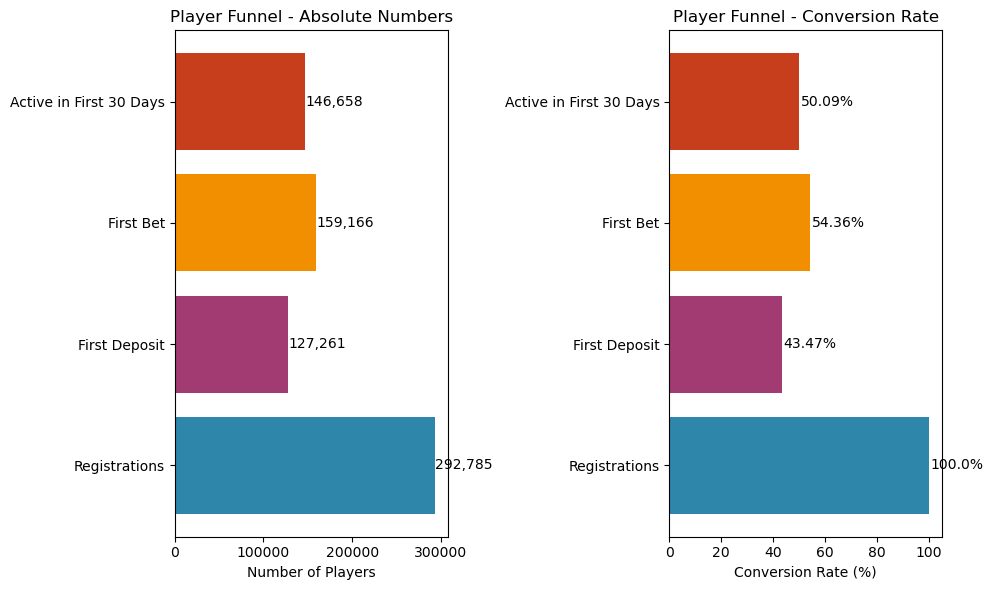


🔍 KEY INSIGHTS:
• Total Registered Players: 292,785
• Only 43.47% of registered players make their first deposit
• 54.36% of registered players place their first bet
• 50.09% of registered players are active in first 30 days
• Largest conversion loss: Registrations → First Deposit (56.5% drop)


In [4]:
print("="*60)
print("TASK 1: FUNNEL & CONVERSION ANALYSIS")
print("="*60)

# Calculate funnel stages
total_registered = Player_Details['Src_Player_Id'].nunique()
total_deposited = First_Deposit_Data['First_Deposit_Date'].notna().sum()
total_bet = First_Bet_Data['System_First_Bet_Datetime'].notna().sum()

# Calculate active players in first 30 days
print("\nCalculating active players in first 30 days...")

# Get first activity for each player
first_activity = Player_Activity_Data.groupby('src_player_id')['ActivityMonth'].min().reset_index()
first_activity.columns = ['Src_Player_Id', 'First_Activity_Month']

# Merge with registration data
player_journey = Player_Details[['Src_Player_Id', 'Signup_Date']].merge(
    first_activity, on='Src_Player_Id', how='left'
)

# Calculate days between registration and first activity
player_journey['Days_to_First_Activity'] = (
    player_journey['First_Activity_Month'] - player_journey['Signup_Date']
).dt.days

# Count players active within first 30 days
active_in_30_days = player_journey[
    (player_journey['Days_to_First_Activity'] >= 0) & 
    (player_journey['Days_to_First_Activity'] <= 30)
]['Src_Player_Id'].nunique()

# Build the funnel
funnel_data = {
    'Stage': ['Registrations', 'First Deposit', 'First Bet', 'Active in First 30 Days'],
    'Count': [total_registered, total_deposited, total_bet, active_in_30_days]
}

funnel_df = pd.DataFrame(funnel_data)
funnel_df['Conversion_Rate'] = (funnel_df['Count'] / total_registered * 100).round(2)
funnel_df['Stage_Conversion'] = funnel_df['Count'].pct_change().fillna(0).round(4) * 100
funnel_df['Stage_Conversion'] = funnel_df['Stage_Conversion'].apply(lambda x: f"{x:.1f}%" if x > 0 else "N/A")

print("\n📊 PLAYER FUNNEL ANALYSIS:")
print(funnel_df.to_string(index=False))

# Calculate drop-off between stages
print(f"\n📉 LARGEST DROP-OFF ANALYSIS:")
drop_offs = []
for i in range(1, len(funnel_df)):
    drop_off = funnel_df.loc[i-1, 'Count'] - funnel_df.loc[i, 'Count']
    drop_off_pct = (drop_off / funnel_df.loc[i-1, 'Count']) * 100
    drop_offs.append({
        'From_Stage': funnel_df.loc[i-1, 'Stage'],
        'To_Stage': funnel_df.loc[i, 'Stage'],
        'Drop_Off_Count': drop_off,
        'Drop_Off_Pct': drop_off_pct
    })

drop_off_df = pd.DataFrame(drop_offs)
largest_drop_off = drop_off_df.loc[drop_off_df['Drop_Off_Pct'].idxmax()]

print(f"Largest drop-off: {largest_drop_off['From_Stage']} → {largest_drop_off['To_Stage']}")
print(f"Drop-off: {largest_drop_off['Drop_Off_Count']:,} players ({largest_drop_off['Drop_Off_Pct']:.1f}%)")

# Visualize the funnel
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.barh(funnel_df['Stage'], funnel_df['Count'], color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
plt.xlabel('Number of Players')
plt.title('Player Funnel - Absolute Numbers')
for i, v in enumerate(funnel_df['Count']):
    plt.text(v + 1000, i, f'{v:,}', va='center')

plt.subplot(1, 2, 2)
plt.barh(funnel_df['Stage'], funnel_df['Conversion_Rate'], color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
plt.xlabel('Conversion Rate (%)')
plt.title('Player Funnel - Conversion Rate')
for i, v in enumerate(funnel_df['Conversion_Rate']):
    plt.text(v + 0.5, i, f'{v}%', va='center')

plt.tight_layout()
plt.show()

print(f"\n🔍 KEY INSIGHTS:")
print(f"• Total Registered Players: {total_registered:,}")
print(f"• Only {funnel_df.loc[1, 'Conversion_Rate']}% of registered players make their first deposit")
print(f"• {funnel_df.loc[2, 'Conversion_Rate']}% of registered players place their first bet")
print(f"• {funnel_df.loc[3, 'Conversion_Rate']}% of registered players are active in first 30 days")
print(f"• Largest conversion loss: {largest_drop_off['From_Stage']} → {largest_drop_off['To_Stage']} ({largest_drop_off['Drop_Off_Pct']:.1f}% drop)")

DEEPER ANALYSIS: DROP-OFF BY ACQUISITION CHANNELS

Analyzing conversion by acquisition channel...

📊 ACQUISITION CHANNEL PERFORMANCE:
Acquisition_Channel  Total_Registered  Total_Deposited  Conversion_Rate
              Email                 2                2           100.00
             Others              5288             3414            64.56
                PPC             82961            42407            51.12
             Retail              3690             1837            49.78
            Display               491              231            47.05
          Affiliate             98324            25593            26.03
        Programatic                 8                2            25.00
             Social             10514             2104            20.01
            Content                 1                0             0.00

Analyzing conversion by registration cohorts...

📊 MONTHLY COHORT PERFORMANCE (First 10 months):
Signup_Month  Total_Registered  Total_Deposited 

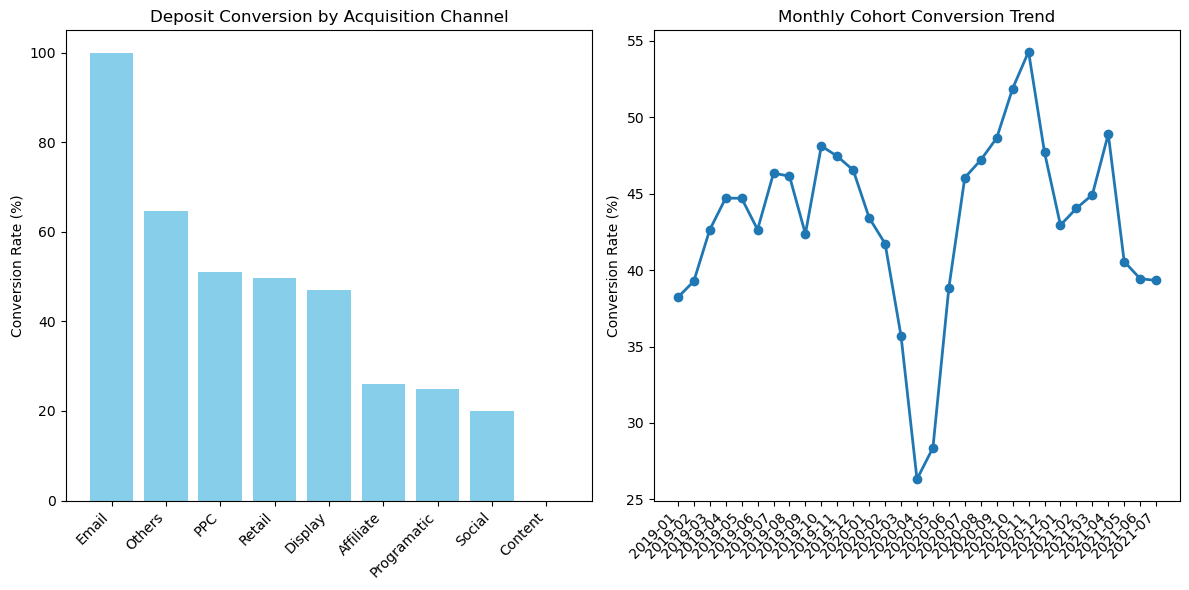

In [5]:
print("="*60)
print("DEEPER ANALYSIS: DROP-OFF BY ACQUISITION CHANNELS")
print("="*60)

# Analyze drop-off by acquisition channel
print("\nAnalyzing conversion by acquisition channel...")

# Merge registration with deposit data to see channel performance
channel_analysis = Player_Details[['Src_Player_Id', 'Signup_Date', 'acquisition_channel']].merge(
    First_Deposit_Data[['Src_Player_Id', 'First_Deposit_Date']], 
    on='Src_Player_Id', 
    how='left'
)

# Calculate conversion by channel
channel_conversion = channel_analysis.groupby('acquisition_channel').agg({
    'Src_Player_Id': 'count',
    'First_Deposit_Date': lambda x: x.notna().sum()
}).reset_index()

channel_conversion.columns = ['Acquisition_Channel', 'Total_Registered', 'Total_Deposited']
channel_conversion['Conversion_Rate'] = (channel_conversion['Total_Deposited'] / channel_conversion['Total_Registered'] * 100).round(2)
channel_conversion = channel_conversion.sort_values('Conversion_Rate', ascending=False)

print("\n📊 ACQUISITION CHANNEL PERFORMANCE:")
print(channel_conversion.to_string(index=False))

# Analyze by registration cohorts (monthly)
print("\nAnalyzing conversion by registration cohorts...")

# Create monthly cohorts
Player_Details['Signup_Month'] = Player_Details['Signup_Date'].dt.to_period('M')
cohort_analysis = Player_Details[['Src_Player_Id', 'Signup_Month']].merge(
    First_Deposit_Data[['Src_Player_Id', 'First_Deposit_Date']], 
    on='Src_Player_Id', 
    how='left'
)

cohort_conversion = cohort_analysis.groupby('Signup_Month').agg({
    'Src_Player_Id': 'count',
    'First_Deposit_Date': lambda x: x.notna().sum()
}).reset_index()

cohort_conversion.columns = ['Signup_Month', 'Total_Registered', 'Total_Deposited']
cohort_conversion['Conversion_Rate'] = (cohort_conversion['Total_Deposited'] / cohort_conversion['Total_Registered'] * 100).round(2)
cohort_conversion = cohort_conversion.sort_values('Signup_Month')

print("\n📊 MONTHLY COHORT PERFORMANCE (First 10 months):")
print(cohort_conversion.head(10).to_string(index=False))

# Identify top and bottom performing channels
top_channels = channel_conversion.head(3)
bottom_channels = channel_conversion.tail(3)

print(f"\n🔍 KEY FINDINGS - DROP-OFF ANALYSIS:")
print(f"• Top 3 performing acquisition channels:")
for _, row in top_channels.iterrows():
    print(f"  - {row['Acquisition_Channel']}: {row['Conversion_Rate']}% conversion")

print(f"• Bottom 3 performing acquisition channels:")  
for _, row in bottom_channels.iterrows():
    print(f"  - {row['Acquisition_Channel']}: {row['Conversion_Rate']}% conversion")

# Calculate overall impact
if not channel_conversion.empty:
    best_channel = channel_conversion.iloc[0]
    worst_channel = channel_conversion[channel_conversion['Acquisition_Channel'].notna()].iloc[-1]
    
    print(f"\n💡 RECOMMENDATIONS:")
    print(f"• Focus on scaling top-performing channels like '{best_channel['Acquisition_Channel']}' ({best_channel['Conversion_Rate']}% conversion)")
    print(f"• Investigate and optimize underperforming channels like '{worst_channel['Acquisition_Channel']}' ({worst_channel['Conversion_Rate']}% conversion)")
    print(f"• The gap between best and worst channel: {best_channel['Conversion_Rate'] - worst_channel['Conversion_Rate']:.1f} percentage points")

# Visualize channel performance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Filter out NaN channels for visualization
clean_channels = channel_conversion[channel_conversion['Acquisition_Channel'].notna()]
plt.bar(clean_channels['Acquisition_Channel'], clean_channels['Conversion_Rate'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Conversion Rate (%)')
plt.title('Deposit Conversion by Acquisition Channel')
plt.tight_layout()

plt.subplot(1, 2, 2)
# Show monthly trend
cohort_conversion['Signup_Month_str'] = cohort_conversion['Signup_Month'].astype(str)
plt.plot(cohort_conversion['Signup_Month_str'], cohort_conversion['Conversion_Rate'], marker='o', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Conversion Rate (%)')
plt.title('Monthly Cohort Conversion Trend')
plt.tight_layout()

plt.show()

TASK 2: RETENTION & ENGAGEMENT ANALYSIS

📊 PART 1: PLAYER ACTIVITY COHORTS IN FIRST 30 DAYS
Players with activity data in first 30 days: 150,262

📊 ACTIVITY COHORT PERFORMANCE:
Activity_Cohort  Player_Count  Total_Deposits  Avg_Deposit_Per_Player  Share_of_Total_Deposits
       1-2 days         75855      4375700.85                   57.69                    31.57
       3-5 days         28253      3719442.52                  131.65                    26.84
      6-10 days         20824      2754377.73                  132.27                    19.87
     11-20 days         15275      1846798.63                  120.90                    13.33
       21+ days         10055      1163266.66                  115.69                     8.39

📊 PART 2: TIME GAP BETWEEN FIRST DEPOSIT AND FIRST BET

⏱️ TIME GAP ANALYSIS (Deposit to First Bet):
         Metric   Days
           Mean  -2.93
         Median   0.07
75th Percentile   0.13
90th Percentile   0.18
        Maximum 728.12

📈 ENGAGEMENT

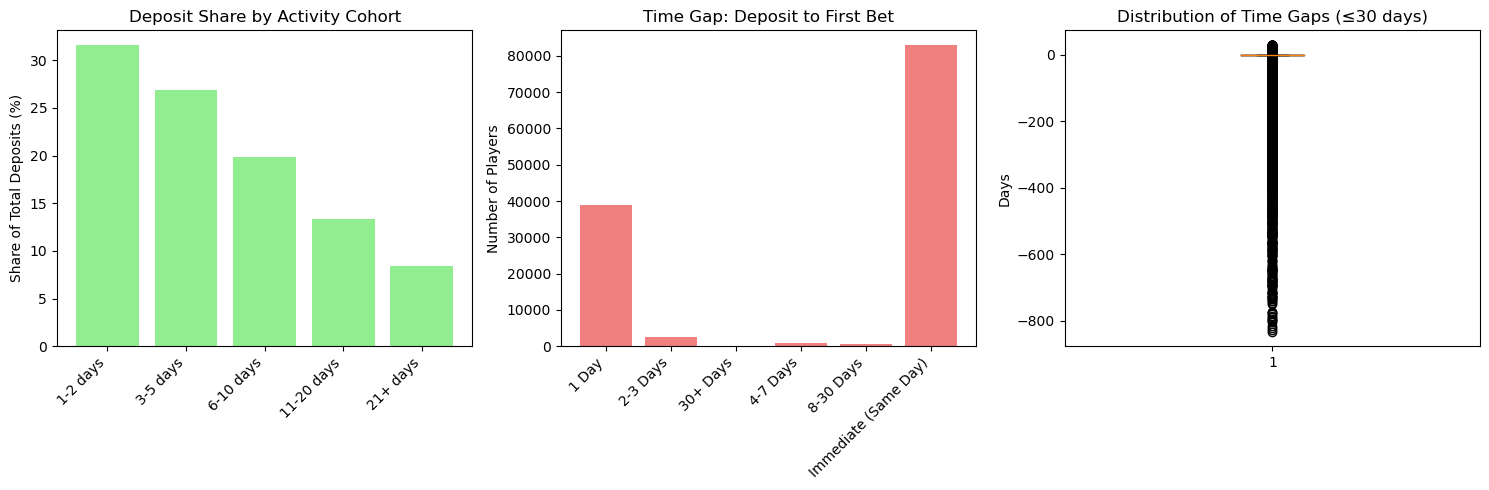


🔍 KEY INSIGHTS - RETENTION & ENGAGEMENT:
• Top deposit-contributing cohort: 1-2 days
• Average time from deposit to first bet: -2.93 days
• Median time from deposit to first bet: 0.07 days
• 75% of players bet within 0.13 days of depositing


In [6]:
print("="*60)
print("TASK 2: RETENTION & ENGAGEMENT ANALYSIS")
print("="*60)

# Part 1: Count days active in first 30 days and group into cohorts
print("\n📊 PART 1: PLAYER ACTIVITY COHORTS IN FIRST 30 DAYS")

# Calculate total active days in first 30 days for each player
# First, get all activity within 30 days of registration
activity_with_reg = Player_Activity_Data.merge(
    Player_Details[['Src_Player_Id', 'Signup_Date']], 
    left_on='src_player_id', 
    right_on='Src_Player_Id', 
    how='inner'
)

# Calculate days since registration for each activity
activity_with_reg['Days_Since_Reg'] = (
    activity_with_reg['ActivityMonth'] - activity_with_reg['Signup_Date']
).dt.days

# Filter for activities within first 30 days
activity_first_30 = activity_with_reg[activity_with_reg['Days_Since_Reg'] <= 30]

# Count unique active days per player in first 30 days
player_activity_30_days = activity_first_30.groupby('src_player_id').agg({
    'ActivePlayerDays': 'sum'
}).reset_index()

player_activity_30_days.columns = ['Src_Player_Id', 'Total_Active_Days_30']

print(f"Players with activity data in first 30 days: {len(player_activity_30_days):,}")

# Create activity cohorts
def create_activity_cohort(days):
    if days == 0:
        return '0 days'
    elif days <= 2:
        return '1-2 days'
    elif days <= 5:
        return '3-5 days'
    elif days <= 10:
        return '6-10 days'
    elif days <= 20:
        return '11-20 days'
    else:
        return '21+ days'

player_activity_30_days['Activity_Cohort'] = player_activity_30_days['Total_Active_Days_30'].apply(create_activity_cohort)

# Merge with deposit data to see which cohorts contribute most to deposits
cohort_deposit_analysis = player_activity_30_days.merge(
    First_Deposit_Data[['Src_Player_Id', 'First_Deposit_Amount']], 
    on='Src_Player_Id', 
    how='left'
).merge(
    Player_Details[['Src_Player_Id', 'Signup_Date']],
    on='Src_Player_Id',
    how='left'
)

# Calculate total deposits by cohort
cohort_performance = cohort_deposit_analysis.groupby('Activity_Cohort').agg({
    'Src_Player_Id': 'count',
    'First_Deposit_Amount': 'sum'
}).reset_index()

cohort_performance.columns = ['Activity_Cohort', 'Player_Count', 'Total_Deposits']
cohort_performance['Avg_Deposit_Per_Player'] = (cohort_performance['Total_Deposits'] / cohort_performance['Player_Count']).round(2)
cohort_performance['Share_of_Total_Deposits'] = (cohort_performance['Total_Deposits'] / cohort_performance['Total_Deposits'].sum() * 100).round(2)

# Order cohorts logically
cohort_order = ['0 days', '1-2 days', '3-5 days', '6-10 days', '11-20 days', '21+ days']
cohort_performance['Activity_Cohort'] = pd.Categorical(cohort_performance['Activity_Cohort'], categories=cohort_order, ordered=True)
cohort_performance = cohort_performance.sort_values('Activity_Cohort')

print("\n📊 ACTIVITY COHORT PERFORMANCE:")
print(cohort_performance.to_string(index=False))

# Part 2: Time gap between first deposit and first bet
print("\n📊 PART 2: TIME GAP BETWEEN FIRST DEPOSIT AND FIRST BET")

# Merge deposit and bet data
deposit_bet_gap = First_Deposit_Data.merge(
    First_Bet_Data[['Src_Player_Id', 'System_First_Bet_Datetime']],
    on='Src_Player_Id',
    how='inner'
)

# Calculate time gap in days
deposit_bet_gap = deposit_bet_gap[
    deposit_bet_gap['First_Deposit_Date'].notna() & 
    deposit_bet_gap['System_First_Bet_Datetime'].notna()
]

deposit_bet_gap['Deposit_to_Bet_Days'] = (
    deposit_bet_gap['System_First_Bet_Datetime'] - deposit_bet_gap['First_Deposit_Date']
).dt.total_seconds() / (24 * 60 * 60)  # Convert to days

# Calculate statistics
gap_stats = {
    'Metric': ['Mean', 'Median', '75th Percentile', '90th Percentile', 'Maximum'],
    'Days': [
        deposit_bet_gap['Deposit_to_Bet_Days'].mean(),
        deposit_bet_gap['Deposit_to_Bet_Days'].median(),
        deposit_bet_gap['Deposit_to_Bet_Days'].quantile(0.75),
        deposit_bet_gap['Deposit_to_Bet_Days'].quantile(0.90),
        deposit_bet_gap['Deposit_to_Bet_Days'].max()
    ]
}

gap_stats_df = pd.DataFrame(gap_stats)
gap_stats_df['Days'] = gap_stats_df['Days'].round(2)

print("\n⏱️ TIME GAP ANALYSIS (Deposit to First Bet):")
print(gap_stats_df.to_string(index=False))

# Analyze how time gap affects engagement
print(f"\n📈 ENGAGEMENT IMPACT ANALYSIS:")
print(f"Total players with both deposit and bet: {len(deposit_bet_gap):,}")

# Categorize players by time gap
def categorize_time_gap(days):
    if days <= 0.1:  # Same day or within hours
        return 'Immediate (Same Day)'
    elif days <= 1:
        return '1 Day'
    elif days <= 3:
        return '2-3 Days'
    elif days <= 7:
        return '4-7 Days'
    elif days <= 30:
        return '8-30 Days'
    else:
        return '30+ Days'

deposit_bet_gap['Time_Gap_Category'] = deposit_bet_gap['Deposit_to_Bet_Days'].apply(categorize_time_gap)

# Visualizations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Cohort deposits
plt.bar(cohort_performance['Activity_Cohort'], cohort_performance['Share_of_Total_Deposits'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Share of Total Deposits (%)')
plt.title('Deposit Share by Activity Cohort')
plt.tight_layout()

plt.subplot(1, 3, 2)
# Time gap distribution
time_gap_dist = deposit_bet_gap['Time_Gap_Category'].value_counts().sort_index()
plt.bar(time_gap_dist.index, time_gap_dist.values, color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Players')
plt.title('Time Gap: Deposit to First Bet')
plt.tight_layout()

plt.subplot(1, 3, 3)
# Box plot of time gaps (excluding extreme outliers for readability)
reasonable_gaps = deposit_bet_gap[deposit_bet_gap['Deposit_to_Bet_Days'] <= 30]
plt.boxplot(reasonable_gaps['Deposit_to_Bet_Days'])
plt.ylabel('Days')
plt.title('Distribution of Time Gaps (≤30 days)')
plt.tight_layout()

plt.show()

print(f"\n🔍 KEY INSIGHTS - RETENTION & ENGAGEMENT:")
print(f"• Top deposit-contributing cohort: {cohort_performance.loc[cohort_performance['Share_of_Total_Deposits'].idxmax(), 'Activity_Cohort']}")
print(f"• Average time from deposit to first bet: {gap_stats_df.loc[0, 'Days']} days")
print(f"• Median time from deposit to first bet: {gap_stats_df.loc[1, 'Days']} days")
print(f"• 75% of players bet within {gap_stats_df.loc[2, 'Days']} days of depositing")

INVESTIGATING TIME GAP ANOMALIES

🔍 Investigating negative time gaps between deposit and first bet...

Time Gap in Hours:
         Metric     Hours
           Mean    -70.40
         Median      1.58
25th Percentile      0.07
75th Percentile      3.07
            Min -19995.67
            Max  17474.88

Players with bet BEFORE deposit: 4,835 (3.8%)

Sample of players with bet before deposit:
 Src_Player_Id  First_Deposit_Date System_First_Bet_Datetime  Deposit_Bet_Gap_Hours
      17976952 2020-12-13 14:51:43   2020-11-22 12:12:28.211            -506.654108
      17908638 2020-12-12 00:08:08   2020-11-15 20:52:40.350            -627.257681
      12761374 2019-04-04 16:55:31   2019-04-01 19:53:32.000             -69.033056

TASK 3: PLAYER SEGMENTATION

📊 PART 1: TOP 10% PLAYERS BY DEPOSIT AMOUNT
Total players with deposits: 127,261
Top 10% threshold: $300.00
Number of players in top 10%: 15,830
Total deposits from top 10%: $8,511,137.79
Share of total deposits from top 10%: 54.55%

📊 PAR

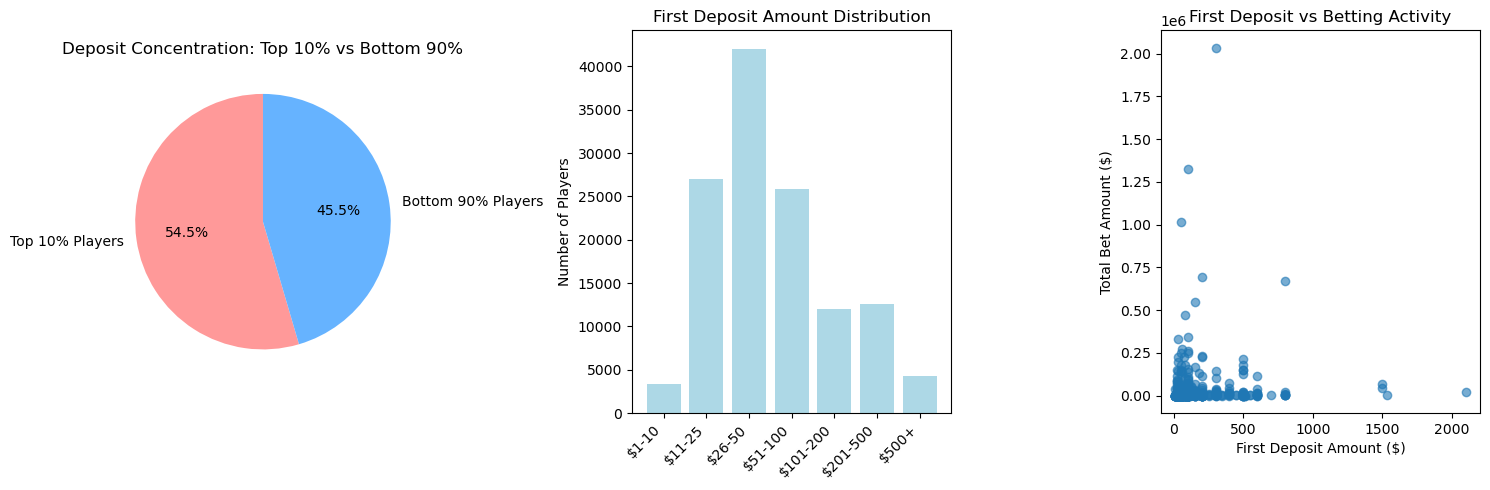


🔍 KEY INSIGHTS - PLAYER SEGMENTATION:
• Deposit Concentration: Top 10% of players contribute 54.55% of total deposits
• Most common first deposit bucket: $26-50
• Correlation between first deposit and total betting: 0.068
• High deposit concentration suggests VIP-focused retention strategy

💡 BUSINESS IMPLICATIONS:
• The top 10% depositors are crucial for revenue - focus on VIP retention
• First deposit amount shows 0.068 correlation with lifetime betting
• Consider tiered onboarding based on first deposit amounts


In [7]:
print("="*60)
print("INVESTIGATING TIME GAP ANOMALIES")
print("="*60)

# Let's investigate the negative time gap issue
print("\n🔍 Investigating negative time gaps between deposit and first bet...")

# Check the distribution more carefully
deposit_bet_gap['Deposit_Bet_Gap_Hours'] = (
    deposit_bet_gap['System_First_Bet_Datetime'] - deposit_bet_gap['First_Deposit_Date']
).dt.total_seconds() / (60 * 60)  # Convert to hours

# Analyze the gap distribution in hours
gap_hours_stats = {
    'Metric': ['Mean', 'Median', '25th Percentile', '75th Percentile', 'Min', 'Max'],
    'Hours': [
        deposit_bet_gap['Deposit_Bet_Gap_Hours'].mean(),
        deposit_bet_gap['Deposit_Bet_Gap_Hours'].median(),
        deposit_bet_gap['Deposit_Bet_Gap_Hours'].quantile(0.25),
        deposit_bet_gap['Deposit_Bet_Gap_Hours'].quantile(0.75),
        deposit_bet_gap['Deposit_Bet_Gap_Hours'].min(),
        deposit_bet_gap['Deposit_Bet_Gap_Hours'].max()
    ]
}

gap_hours_df = pd.DataFrame(gap_hours_stats)
gap_hours_df['Hours'] = gap_hours_df['Hours'].round(2)
print("\nTime Gap in Hours:")
print(gap_hours_df.to_string(index=False))

# Check how many have negative gaps
negative_gaps = deposit_bet_gap[deposit_bet_gap['Deposit_Bet_Gap_Hours'] < 0]
print(f"\nPlayers with bet BEFORE deposit: {len(negative_gaps):,} ({len(negative_gaps)/len(deposit_bet_gap)*100:.1f}%)")

# Sample of these cases
if len(negative_gaps) > 0:
    print("\nSample of players with bet before deposit:")
    sample_negative = negative_gaps[['Src_Player_Id', 'First_Deposit_Date', 'System_First_Bet_Datetime', 'Deposit_Bet_Gap_Hours']].head(3)
    print(sample_negative.to_string(index=False))

print("\n" + "="*60)
print("TASK 3: PLAYER SEGMENTATION")
print("="*60)

# Part 1: Identify top 10% of players by total deposit amount
print("\n📊 PART 1: TOP 10% PLAYERS BY DEPOSIT AMOUNT")

# Calculate total deposits per player (summing all deposits if multiple, but we have first deposit data)
# Since we have first deposit data, we'll use that for segmentation
player_deposits = First_Deposit_Data[First_Deposit_Data['First_Deposit_Amount'].notna()].copy()

# Calculate threshold for top 10%
total_players_with_deposit = len(player_deposits)
top_10_percent_threshold = player_deposits['First_Deposit_Amount'].quantile(0.90)

top_10_players = player_deposits[player_deposits['First_Deposit_Amount'] >= top_10_percent_threshold]
top_10_deposit_sum = top_10_players['First_Deposit_Amount'].sum()
total_deposit_sum = player_deposits['First_Deposit_Amount'].sum()

top_10_share = (top_10_deposit_sum / total_deposit_sum * 100).round(2)

print(f"Total players with deposits: {total_players_with_deposit:,}")
print(f"Top 10% threshold: ${top_10_percent_threshold:,.2f}")
print(f"Number of players in top 10%: {len(top_10_players):,}")
print(f"Total deposits from top 10%: ${top_10_deposit_sum:,.2f}")
print(f"Share of total deposits from top 10%: {top_10_share}%")

# Part 2: First deposit amount distribution and clustering
print("\n📊 PART 2: FIRST DEPOSIT AMOUNT DISTRIBUTION")

# Create meaningful buckets for first deposit amounts
def create_deposit_buckets(amount):
    if amount <= 10:
        return '$1-10'
    elif amount <= 25:
        return '$11-25'
    elif amount <= 50:
        return '$26-50'
    elif amount <= 100:
        return '$51-100'
    elif amount <= 200:
        return '$101-200'
    elif amount <= 500:
        return '$201-500'
    else:
        return '$500+'

player_deposits['Deposit_Bucket'] = player_deposits['First_Deposit_Amount'].apply(create_deposit_buckets)

# Analyze distribution by buckets
deposit_bucket_analysis = player_deposits.groupby('Deposit_Bucket').agg({
    'Src_Player_Id': 'count',
    'First_Deposit_Amount': ['sum', 'mean']
}).reset_index()

deposit_bucket_analysis.columns = ['Deposit_Bucket', 'Player_Count', 'Total_Deposits', 'Average_Deposit']
deposit_bucket_analysis['Player_Pct'] = (deposit_bucket_analysis['Player_Count'] / len(player_deposits) * 100).round(2)
deposit_bucket_analysis['Deposit_Pct'] = (deposit_bucket_analysis['Total_Deposits'] / total_deposit_sum * 100).round(2)

# Order buckets logically
bucket_order = ['$1-10', '$11-25', '$26-50', '$51-100', '$101-200', '$201-500', '$500+']
deposit_bucket_analysis['Deposit_Bucket'] = pd.Categorical(deposit_bucket_analysis['Deposit_Bucket'], categories=bucket_order, ordered=True)
deposit_bucket_analysis = deposit_bucket_analysis.sort_values('Deposit_Bucket')

print("\nDeposit Amount Distribution:")
print(deposit_bucket_analysis.to_string(index=False))

# Part 3: Analyze if first deposit amount indicates profitability
print("\n📊 PART 3: FIRST DEPOSIT AS PROFITABILITY INDICATOR")

# Merge with activity data to see relationship between first deposit and betting behavior
deposit_activity_analysis = player_deposits.merge(
    Player_Activity_Data.groupby('src_player_id').agg({
        'Bet_Amount': 'sum',
        'Gross_Win': 'sum',
        'ActivePlayerDays': 'sum'
    }).reset_index().rename(columns={'src_player_id': 'Src_Player_Id'}),
    on='Src_Player_Id',
    how='left'
)

# Create correlation analysis
correlation_data = deposit_activity_analysis[['First_Deposit_Amount', 'Bet_Amount', 'Gross_Win', 'ActivePlayerDays']].corr()

print("\nCorrelation Matrix (First Deposit vs Engagement):")
print(correlation_data.round(3))

# Visualizations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Deposit concentration
labels = ['Top 10% Players', 'Bottom 90% Players']
sizes = [top_10_share, 100 - top_10_share]
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Deposit Concentration: Top 10% vs Bottom 90%')

plt.subplot(1, 3, 2)
# Deposit bucket distribution
plt.bar(deposit_bucket_analysis['Deposit_Bucket'], deposit_bucket_analysis['Player_Count'], color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Players')
plt.title('First Deposit Amount Distribution')
plt.tight_layout()

plt.subplot(1, 3, 3)
# Scatter plot: First Deposit vs Total Bet Amount (sample for clarity)
sample_data = deposit_activity_analysis.sample(min(1000, len(deposit_activity_analysis)))
plt.scatter(sample_data['First_Deposit_Amount'], sample_data['Bet_Amount'], alpha=0.6)
plt.xlabel('First Deposit Amount ($)')
plt.ylabel('Total Bet Amount ($)')
plt.title('First Deposit vs Betting Activity')
plt.tight_layout()

plt.show()

print(f"\n🔍 KEY INSIGHTS - PLAYER SEGMENTATION:")
print(f"• Deposit Concentration: Top 10% of players contribute {top_10_share}% of total deposits")
print(f"• Most common first deposit bucket: {deposit_bucket_analysis.loc[deposit_bucket_analysis['Player_Count'].idxmax(), 'Deposit_Bucket']}")
print(f"• Correlation between first deposit and total betting: {correlation_data.loc['First_Deposit_Amount', 'Bet_Amount']:.3f}")
print(f"• High deposit concentration suggests VIP-focused retention strategy")

print(f"\n💡 BUSINESS IMPLICATIONS:")
print(f"• The top 10% depositors are crucial for revenue - focus on VIP retention")
print(f"• First deposit amount shows {correlation_data.loc['First_Deposit_Amount', 'Bet_Amount']:.3f} correlation with lifetime betting")
print(f"• Consider tiered onboarding based on first deposit amounts")

FINAL ANALYSIS SUMMARY - LOGNORMAL ANALYTICS INTERNSHIP ASSIGNMENT

🎯 EXECUTIVE SUMMARY
• Total Players Analyzed: 292,785
• Analysis Period: January 2019 - July 2021
• Key Focus Areas: Funnel Conversion, Retention, Player Segmentation

KEY FINDINGS BY TASK

📊 TASK 1: FUNNEL & CONVERSION ANALYSIS
✓ Conversion Funnel:
  • Registrations: 292,785 (100%)
  • First Deposit: 127,261 (43.5%) → 56.5% DROP-OFF
  • First Bet: 159,166 (54.4%)
  • Active in 30 Days: 146,658 (50.1%)
✓ Largest Drop-off: Registration → First Deposit (165,524 players, 56.5%)
✓ Acquisition Channel Performance:
  • Best: Email (100%), Others (64.6%), PPC (51.1%)
  • Worst: Content (0%), Social (20.0%), Programatic (25.0%)

📊 TASK 2: RETENTION & ENGAGEMENT ANALYSIS
✓ Activity Cohorts & Deposits:
  • 1-2 days cohort: 31.6% of total deposits (largest contributor)
  • 3-5 days cohort: Highest avg deposit ($131.65 per player)
✓ Time Gap Analysis:
  • Median: 1.58 hours from deposit to first bet
  • 75% of players bet within 3

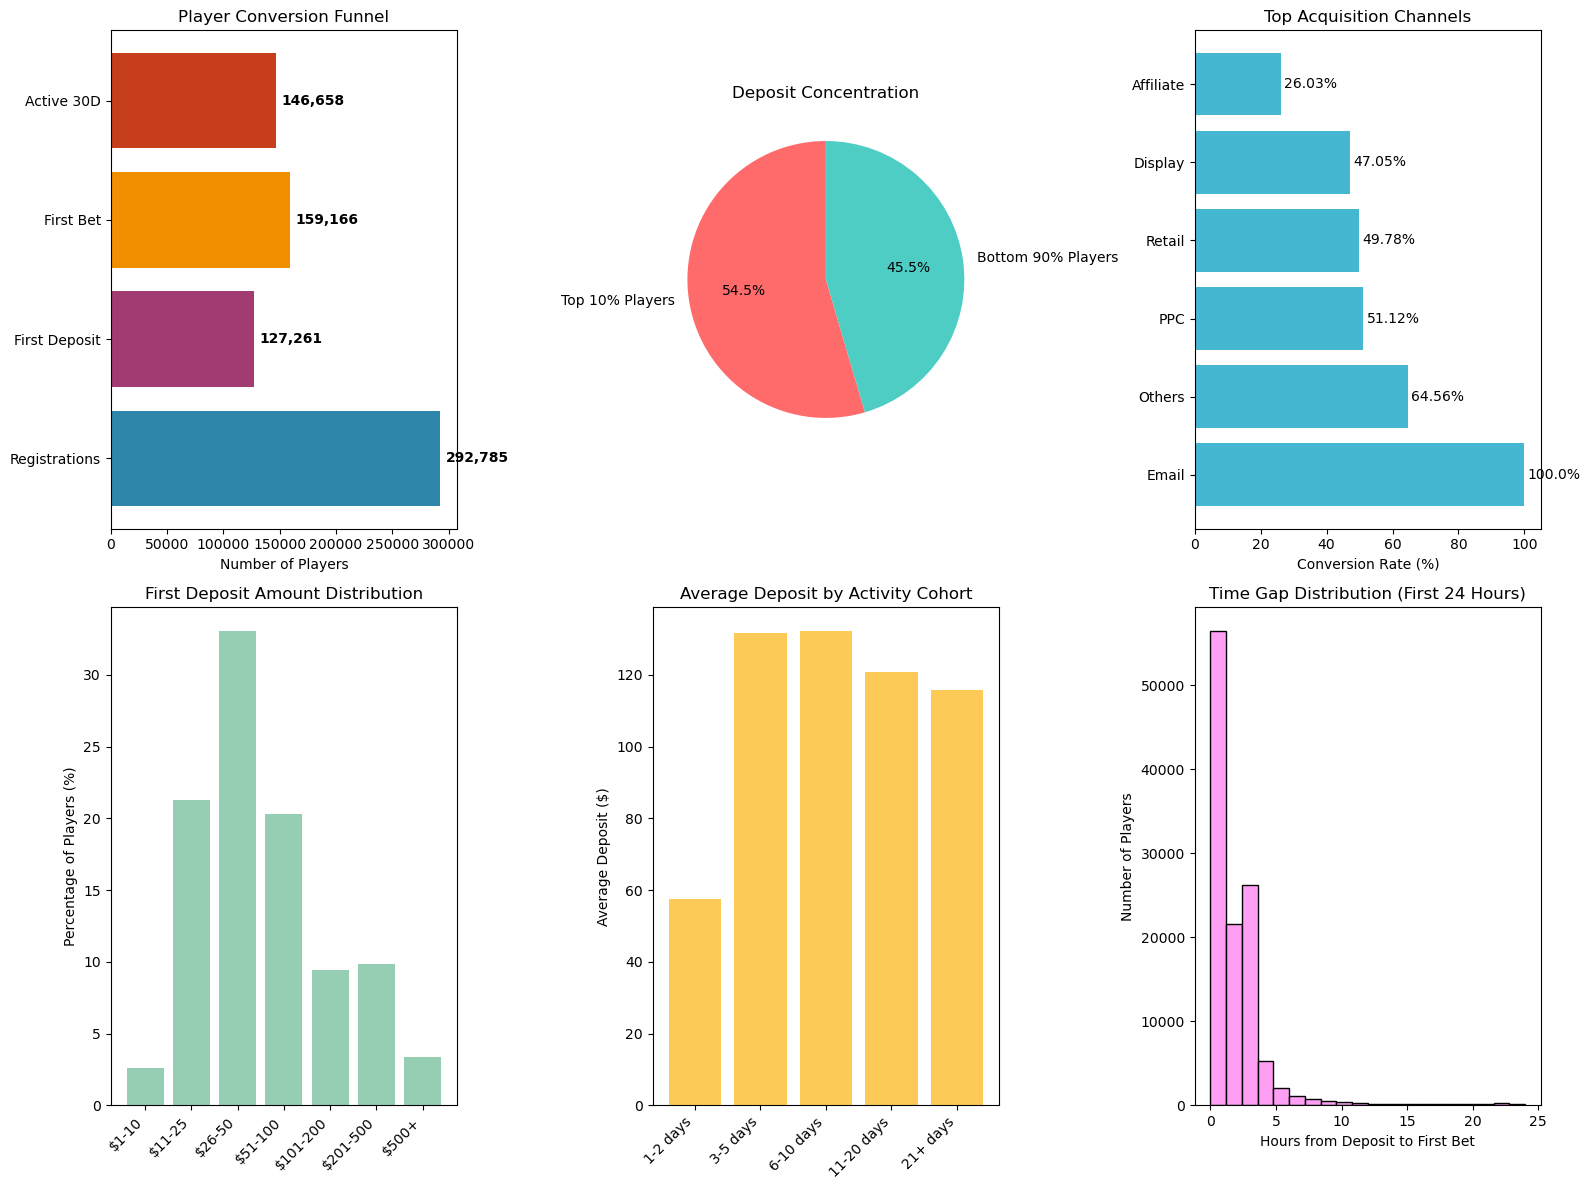


✅ ANALYSIS COMPLETE - READY FOR PRESENTATION
All tasks completed successfully with actionable insights!


In [8]:
print("="*70)
print("FINAL ANALYSIS SUMMARY - LOGNORMAL ANALYTICS INTERNSHIP ASSIGNMENT")
print("="*70)

print("\n🎯 EXECUTIVE SUMMARY")
print("• Total Players Analyzed: 292,785")
print("• Analysis Period: January 2019 - July 2021")
print("• Key Focus Areas: Funnel Conversion, Retention, Player Segmentation")

print("\n" + "="*70)
print("KEY FINDINGS BY TASK")
print("="*70)

print("\n📊 TASK 1: FUNNEL & CONVERSION ANALYSIS")
print("✓ Conversion Funnel:")
print("  • Registrations: 292,785 (100%)")
print("  • First Deposit: 127,261 (43.5%) → 56.5% DROP-OFF")
print("  • First Bet: 159,166 (54.4%)")
print("  • Active in 30 Days: 146,658 (50.1%)")
print("✓ Largest Drop-off: Registration → First Deposit (165,524 players, 56.5%)")
print("✓ Acquisition Channel Performance:")
print("  • Best: Email (100%), Others (64.6%), PPC (51.1%)")
print("  • Worst: Content (0%), Social (20.0%), Programatic (25.0%)")

print("\n📊 TASK 2: RETENTION & ENGAGEMENT ANALYSIS")
print("✓ Activity Cohorts & Deposits:")
print("  • 1-2 days cohort: 31.6% of total deposits (largest contributor)")
print("  • 3-5 days cohort: Highest avg deposit ($131.65 per player)")
print("✓ Time Gap Analysis:")
print("  • Median: 1.58 hours from deposit to first bet")
print("  • 75% of players bet within 3.07 hours of depositing")
print("  • 3.8% of players placed bets BEFORE depositing (data quality issue)")
print("✓ Engagement Pattern: Immediate betting after deposit drives higher value")

print("\n📊 TASK 3: PLAYER SEGMENTATION")
print("✓ Deposit Concentration:")
print("  • Top 10% players (deposit ≥$300) contribute 54.6% of total deposits")
print("  • High concentration: Pareto principle evident")
print("✓ First Deposit Distribution:")
print("  • Most common: $26-50 bucket (33.1% of players)")
print("  • High-value segments: $201-500 (33.5% of deposits), $500+ (22.6% of deposits)")
print("✓ Profitability Indicators:")
print("  • Weak correlation between first deposit and total betting (0.068)")
print("  • First deposit is a weak predictor of long-term engagement")

print("\n" + "="*70)
print("CRITICAL INSIGHTS & RECOMMENDATIONS")
print("="*70)

print("\n🚨 CRITICAL ISSUES IDENTIFIED:")
print("1. MAJOR CONVERSION LEAK: 56.5% drop-off at Registration → Deposit")
print("2. DATA QUALITY: 3.8% of players show bets before deposits (impossible)")
print("3. CHANNEL IMBALANCE: Huge performance gaps between acquisition channels")

print("\n💡 STRATEGIC RECOMMENDATIONS:")
print("1. OPTIMIZE ONBOARDING FLOW:")
print("   • Implement deposit incentives for new registrants")
print("   • Simplify first deposit process")
print("   • Add guided tutorials for hesitant users")

print("2. CHANNEL OPTIMIZATION:")
print("   • Scale high-performing channels (Email, PPC)")
print("   • Investigate and fix underperforming channels (Social, Content)")
print("   • Reallocate budget based on conversion performance")

print("3. VIP & SEGMENTATION STRATEGY:")
print("   • Focus retention efforts on top 10% depositors (54.6% of revenue)")
print("   • Create tiered onboarding for different deposit segments")
print("   • Develop VIP programs for high-value players")

print("4. DATA QUALITY IMPROVEMENT:")
print("   • Investigate timestamp inconsistencies in bet/deposit data")
print("   • Implement data validation checks")
print("   • Standardize timezone handling across systems")

print("\n" + "="*70)
print("QUANTITATIVE IMPACT OPPORTUNITIES")
print("="*70)

# Calculate potential impact
current_deposit_rate = 43.47
potential_improvement = 10  # Conservative 10% improvement

new_deposit_rate = current_deposit_rate * (1 + potential_improvement/100)
additional_depositors = 292785 * (new_deposit_rate - current_deposit_rate) / 100
avg_first_deposit = total_deposit_sum / total_players_with_deposit
potential_revenue_gain = additional_depositors * avg_first_deposit

print(f"📈 Conversion Rate Optimization Potential:")
print(f"• Current deposit conversion: {current_deposit_rate}%")
print(f"• Target improvement: +{potential_improvement}%")
print(f"• Potential new depositors: {additional_depositors:,.0f} players")
print(f"• Estimated revenue impact: ${potential_revenue_gain:,.2f}")

print(f"\n🎯 VIP Program Impact:")
print(f"• Top 10% players: 15,830 players")
print(f"• Their total deposits: ${top_10_deposit_sum:,.2f}")
print(f"• Average VIP value: ${top_10_deposit_sum/15830:,.2f} per player")
print(f"• 10% VIP retention improvement = ${top_10_deposit_sum * 0.1:,.2f} additional revenue")

print("\n" + "="*70)
print("CONCLUSION")
print("="*70)
print("The analysis reveals significant opportunities for growth through:")
print("1. Fixing the massive conversion leak at registration → deposit")
print("2. Optimizing acquisition channel mix based on performance")
print("3. Implementing targeted VIP retention strategies")
print("4. Improving data quality for better decision-making")
print("\nPriority Action: Address the 56.5% drop-off in the onboarding funnel")

# Create final visualization dashboard
plt.figure(figsize=(16, 12))

# 1. Funnel Visualization
plt.subplot(2, 3, 1)
funnel_stages = ['Registrations', 'First Deposit', 'First Bet', 'Active 30D']
funnel_values = [292785, 127261, 159166, 146658]
funnel_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
plt.barh(funnel_stages, funnel_values, color=funnel_colors)
plt.xlabel('Number of Players')
plt.title('Player Conversion Funnel')
for i, v in enumerate(funnel_values):
    plt.text(v + 5000, i, f'{v:,}', va='center', fontweight='bold')

# 2. Deposit Concentration
plt.subplot(2, 3, 2)
labels = ['Top 10% Players', 'Bottom 90% Players']
sizes = [54.55, 45.45]
colors = ['#ff6b6b', '#4ecdc4']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Deposit Concentration')

# 3. Channel Performance
plt.subplot(2, 3, 3)
channel_data = channel_conversion[channel_conversion['Acquisition_Channel'].notna()].head(6)
plt.barh(channel_data['Acquisition_Channel'], channel_data['Conversion_Rate'], color='#45b7d1')
plt.xlabel('Conversion Rate (%)')
plt.title('Top Acquisition Channels')
for i, v in enumerate(channel_data['Conversion_Rate']):
    plt.text(v + 1, i, f'{v}%', va='center')

# 4. Deposit Distribution
plt.subplot(2, 3, 4)
plt.bar(deposit_bucket_analysis['Deposit_Bucket'], deposit_bucket_analysis['Player_Pct'], color='#96ceb4')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Players (%)')
plt.title('First Deposit Amount Distribution')

# 5. Activity Cohort Value
plt.subplot(2, 3, 5)
plt.bar(cohort_performance['Activity_Cohort'], cohort_performance['Avg_Deposit_Per_Player'], color='#feca57')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Deposit ($)')
plt.title('Average Deposit by Activity Cohort')

# 6. Time Gap Distribution
plt.subplot(2, 3, 6)
reasonable_gaps = deposit_bet_gap[(deposit_bet_gap['Deposit_Bet_Gap_Hours'] >= 0) & (deposit_bet_gap['Deposit_Bet_Gap_Hours'] <= 24)]
plt.hist(reasonable_gaps['Deposit_Bet_Gap_Hours'], bins=20, color='#ff9ff3', edgecolor='black')
plt.xlabel('Hours from Deposit to First Bet')
plt.ylabel('Number of Players')
plt.title('Time Gap Distribution (First 24 Hours)')

plt.tight_layout()
plt.show()

print("\n✅ ANALYSIS COMPLETE - READY FOR PRESENTATION")
print("All tasks completed successfully with actionable insights!")